<a href="https://colab.research.google.com/github/SMKProj/SentimentAnalysis/blob/main/SentimentAanlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('UScomments.csv',error_bad_lines=False)

<ipython-input-18-200714b8fdca>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('UScomments.csv',error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

<ipython-input-18-200714b8fdca>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('UScomments.csv',error_bad_lines=False)


In [19]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [21]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
!pip install textblob

In [24]:
from textblob import TextBlob

In [29]:
len(df['comment_text'])

691375

In [30]:
df['comment_text'][0]

"Logan Paul it's yo big day ‼️‼️‼️"

In [32]:
polarity = []
for comments in df['comment_text']:
  polarity.append(TextBlob(comments).sentiment.polarity)




In [33]:
df['polarity'] = polarity
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [84]:
mostpc = df['polarity'] == 1.0
lesspc = (df['polarity']>=0.0) & (df['polarity'] < 1.0)
mostnc = df['polarity'] == -1.0
lessnc = (df['polarity']>-1.0) & (df['polarity'] < 0.0)

In [91]:
a = len(df[mostpc])
b = len(df[lesspc])
c = len(df[mostnc])
d = len(df[lessnc])
print(a+b+c+d)

691375


In [108]:
most_positive_comments = df[mostpc]
less_positive_comments = df[lesspc]
most_negative_comments = df[mostnc]
less_negative_comments = df[lessnc]

In [ ]:
!pip install wordcloud

In [67]:
from wordcloud import WordCloud, STOPWORDS

In [109]:
most_pos_com = ' '.join(most_positive_comments['comment_text'])
less_pos_com = ' '.join(less_positive_comments['comment_text'])
most_neg_com = ' '.join(most_negative_comments['comment_text'])
less_neg_com = ' '.join(less_negative_comments['comment_text'])

In [ ]:
most_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_pos_com)
less_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_pos_com)
most_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_neg_com)
less_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_neg_com)

(-0.5, 399.5, 199.5, -0.5)

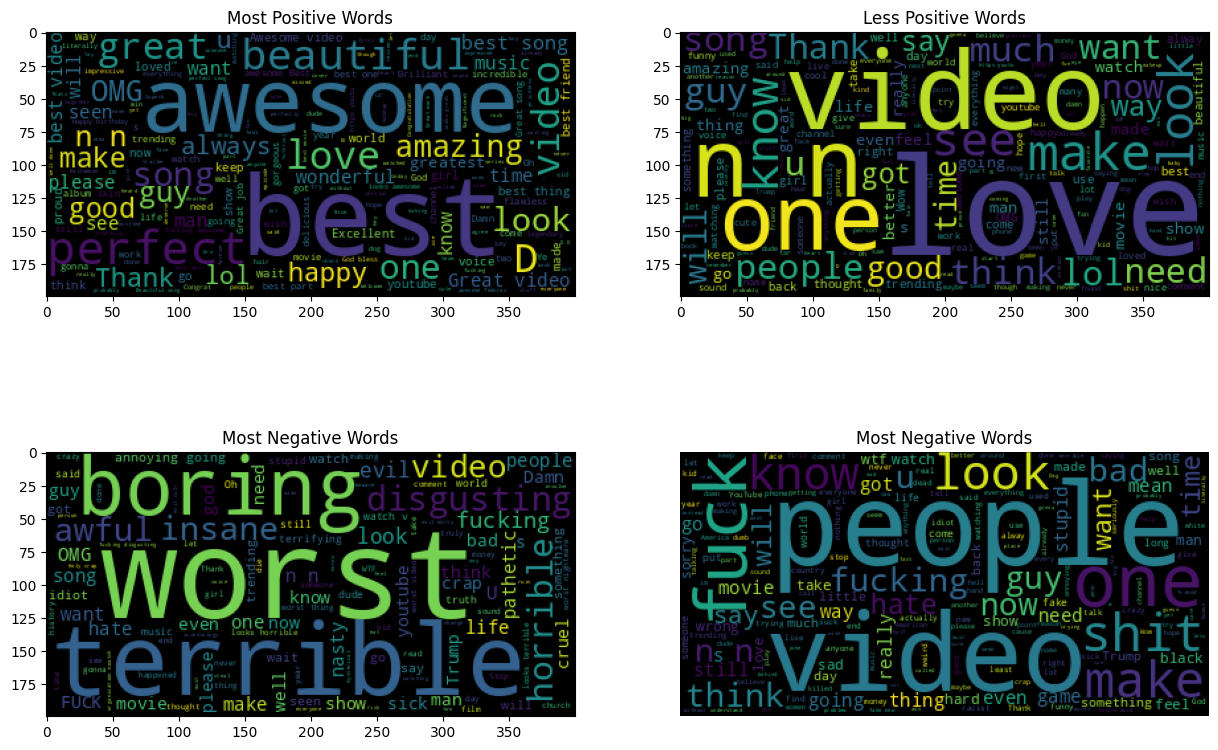

In [157]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Most Positive Words')
plt.imshow(most_pos_wc)
plt.subplot(2,2,2)
plt.title('Less Positive Words')
plt.imshow(less_pos_wc)
plt.subplot(2,2,3)
plt.title('Most Negative Words')
plt.imshow(most_neg_wc)
plt.subplot(2,2,4)
plt.title('Most Negative Words')
plt.imshow(less_neg_wc)
plt.axis('off')

EMOJI Analysis

In [ ]:
!pip install emoji==2.2.0

In [117]:
import emoji

In [129]:
emojiList=[]
for c in df['comment_text']:
  for e in c:
     if e in emoji.EMOJI_DATA:
      emojiList.append(e)

In [130]:
len(emojiList)

294549

In [125]:
from collections import Counter

In [142]:
emojis = []
popularity = []
for r in (range(10)):
  emojis.append(Counter(emojiList).most_common(10)[r][0])
  popularity.append(Counter(emojiList).most_common(10)[r][1])

In [143]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [148]:
trace = go.Bar(x = emojis,y= popularity)
iplot([trace])